# Applied Project: classification model with neural networks

Classification model to predict your customers' purchase of bicycles

## Part I. Import and exploratory analysis (EDA)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
seed = 9
np.random.seed(seed)

In [3]:
filename = 'C:/Users/hgupyff/Documents/Coursera/C. Curso completo de Deep Learning/3. Curso Completo de Deep Learning/BBC.csv'
dataframe = pd.read_csv(filename)

In [4]:
dataframe.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,5,1,90000,2,0,5,1,0,2,2,50,1
1,5,1,60000,3,3,5,0,1,1,2,51,1
2,5,1,60000,3,3,5,1,1,5,2,51,1
3,5,2,70000,0,0,5,0,1,10,2,49,1
4,5,2,80000,5,5,5,1,4,2,2,48,1


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MaritalStatus         18484 non-null  int64
 1   Gender                18484 non-null  int64
 2   YearlyIncome          18484 non-null  int64
 3   TotalChildren         18484 non-null  int64
 4   NumberChildrenAtHome  18484 non-null  int64
 5   EnglishEducation      18484 non-null  int64
 6   HouseOwnerFlag        18484 non-null  int64
 7   NumberCarsOwned       18484 non-null  int64
 8   CommuteDistance       18484 non-null  int64
 9   Region                18484 non-null  int64
 10  Age                   18484 non-null  int64
 11  BikeBuyer             18484 non-null  int64
dtypes: int64(12)
memory usage: 1.7 MB


In [6]:
print(list(dataframe.columns.values))

['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'Region', 'Age', 'BikeBuyer']


<Axes: xlabel='BikeBuyer', ylabel='count'>

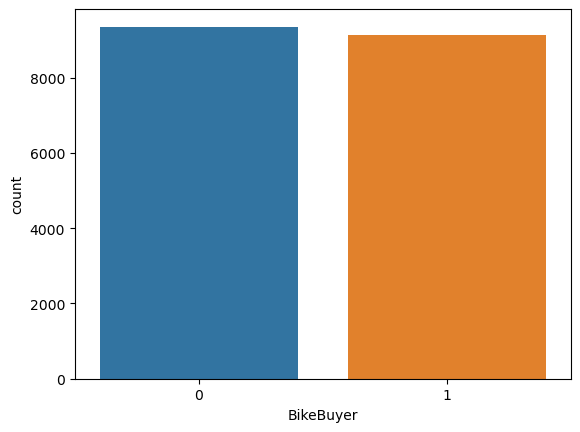

In [7]:
sns.countplot(x='BikeBuyer', data = dataframe)

<Axes: >

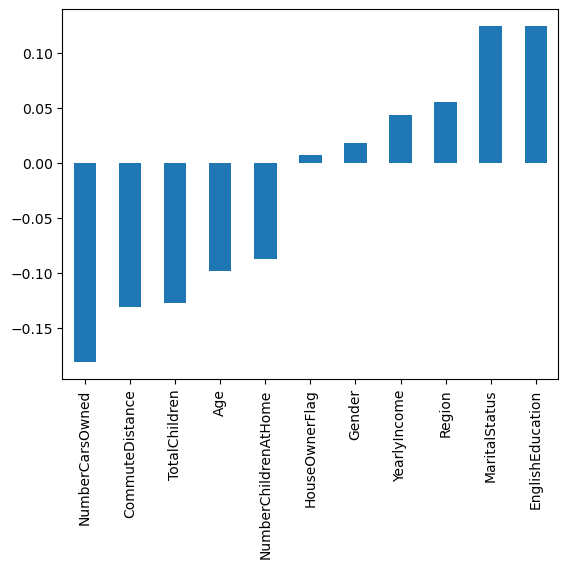

In [8]:
dataframe.corr()['BikeBuyer'].sort_values().drop('BikeBuyer').plot(kind='bar')

In [9]:
from pandas_profiling import ProfileReport
#prof = ProfileReport(hotel, minimal=True)
profile = ProfileReport(dataframe)
profile


C:\Users\hgupyff\AppData\Local\Temp\ipykernel_1416\1837533461.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Part II. Pre-processing

In [10]:
dataframe = dataframe.drop_duplicates()

dataframe = dataframe.drop(columns = ['MaritalStatus'], axis=1)

In [11]:
features_num = [ 'Gender', 'YearlyIncome', 'TotalChildren', 
                'NumberChildrenAtHome', 'EnglishEducation', 'HouseOwnerFlag', 
                'NumberCarsOwned', 'CommuteDistance', 'Region', 'Age']

In [12]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler()   
)

preprocessor = make_column_transformer(
    (transformer_num, features_num)
)


In [13]:
X = dataframe.drop(columns=['BikeBuyer'])
Y = dataframe[['BikeBuyer']]

X = preprocessor.fit_transform(X)

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

input_shape = [X_train.shape[1]]

# Part III. Development of a basic neural network

### Model

In [15]:
input_shape = [X_train.shape[1]]

In [16]:
model = Sequential()

# the hidden ReLU layers
model.add(Dense(12, input_shape=input_shape, activation='relu'))
model.add(Dense(8, activation='relu'))

# the output layer 
model.add(Dense(1, activation='sigmoid'))

C:\Users\hgupyff\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [21]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['binary_accuracy'])

### Model fit

In [22]:
history = model.fit(X_train, y_train, 
                    epochs=40, 
                    validation_data=(X_test, y_test),
                    batch_size=70)

Epoch 1/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - binary_accuracy: 0.5211 - loss: 0.6962 - val_binary_accuracy: 0.5246 - val_loss: 0.6927
Epoch 2/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5408 - loss: 0.6861 - val_binary_accuracy: 0.5484 - val_loss: 0.6877
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5608 - loss: 0.6799 - val_binary_accuracy: 0.5556 - val_loss: 0.6850
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5702 - loss: 0.6773 - val_binary_accuracy: 0.5544 - val_loss: 0.6827
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5871 - loss: 0.6729 - val_binary_accuracy: 0.5578 - val_loss: 0.6804
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5868 - loss: 0.6700 - val_binary_accuracy: 0.5688 - val_loss: 0.6779
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5992 - loss: 0.6652 - val_binary_accuracy: 0.5709 - val_loss: 0.6754
Epoch 8/40
79/79 ━━

### Model evaluation

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
# Get prediction probabilities
predictions = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_test, y_classes))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.61      0.71      0.65      1223
           1       0.61      0.50      0.55      1131

    accuracy                           0.61      2354
   macro avg       0.61      0.60      0.60      2354
weighted avg       0.61      0.61      0.60      2354



<Axes: title={'center': 'Cross-entropy'}>

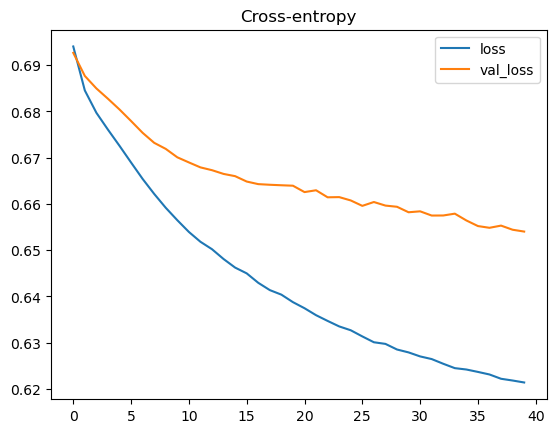

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

## Parte IV. Overfitting y Early Stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model2 = Sequential()

model2.add(Dense(units=256, input_shape=input_shape, activation='relu'))
model2.add(Dense(units=256,activation='relu'))
model2.add(Dense(units=256,activation='relu'))
model2.add(Dense(units=256,activation='relu'))

model2.add(Dense(units=1,activation='sigmoid'))

C:\Users\hgupyff\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
early_stop = EarlyStopping(monitor='val_loss', 
                           verbose=1, 
                           patience=30,
                           min_delta=0.0001,
                           restore_best_weights=True)

model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [42]:
history2 = model2.fit(x=X_train, 
          y=y_train, 
          epochs= 200,
          batch_size=92,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.7116 - loss: 0.5408 - val_binary_accuracy: 0.6300 - val_loss: 0.6580
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7193 - loss: 0.5306 - val_binary_accuracy: 0.6279 - val_loss: 0.6602
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7144 - loss: 0.5315 - val_binary_accuracy: 0.6393 - val_loss: 0.6728
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7148 - loss: 0.5262 - val_binary_accuracy: 0.6389 - val_loss: 0.6554
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7244 - loss: 0.5222 - val_binary_accuracy: 0.6274 - val_loss: 0.6778
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7287 - loss: 0.5169 - val_binary_accuracy: 0.6338 - val_loss: 0.6961
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7297 - loss: 0.5157 - val_binary_accuracy: 0.6330 - val_loss: 0.6865
Epoch 8/200


In [47]:
# Get prediction probabilities
predictions = model2.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_test, y_classes))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1223
           1       0.61      0.62      0.62      1131

    accuracy                           0.63      2354
   macro avg       0.63      0.63      0.63      2354
weighted avg       0.63      0.63      0.63      2354



In [44]:
history_df = pd.DataFrame(history2.history)

In [45]:
print(history_df.columns)

Index(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'], dtype='object')


<Axes: title={'center': 'Cross-entropy'}>

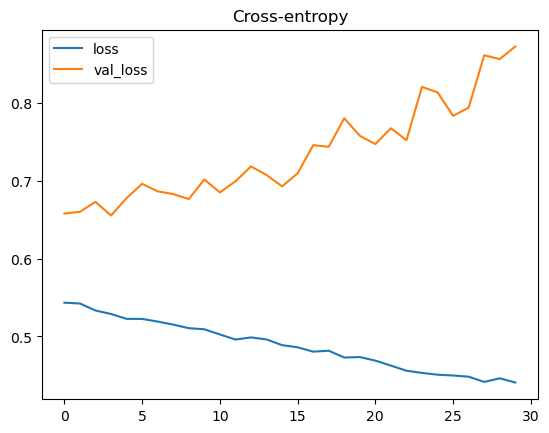

In [46]:
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

### confusion_matrix

In [52]:
print(confusion_matrix(y_test,y_classes))

[[786 437]
 [434 697]]


## Parte V. Dropout y BatchNormalization

In [48]:
from keras.layers import BatchNormalization, Dropout

In [57]:
model3 = Sequential()

model3.add(BatchNormalization(input_shape=input_shape))

model3.add(Dense(units=456,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(units=456,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))


model3.add(Dense(units=1,
                activation='sigmoid'))


C:\Users\hgupyff\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
early_stop = EarlyStopping(monitor='val_loss', 
                           verbose=1, 
                           patience=10,
                           min_delta=0.0001,
                           restore_best_weights=True)

model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [59]:
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=52,
    epochs=150,
    callbacks=[early_stop],
)

Epoch 1/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - binary_accuracy: 0.5584 - loss: 0.8898 - val_binary_accuracy: 0.5845 - val_loss: 0.6690
Epoch 2/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.5932 - loss: 0.7242 - val_binary_accuracy: 0.5964 - val_loss: 0.6673
Epoch 3/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.5975 - loss: 0.7027 - val_binary_accuracy: 0.6037 - val_loss: 0.6527
Epoch 4/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6047 - loss: 0.6731 - val_binary_accuracy: 0.6045 - val_loss: 0.6524
Epoch 5/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6164 - loss: 0.6515 - val_binary_accuracy: 0.6100 - val_loss: 0.6566
Epoch 6/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6287 - loss: 0.6436 - val_binary_accuracy: 0.6134 - val_loss: 0.6521
Epoch 7/150
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.6310 - loss: 0.6389 - val_binary_accuracy: 0.6172 - val_loss: 0.653

<Axes: title={'center': 'Cross-entropy'}>

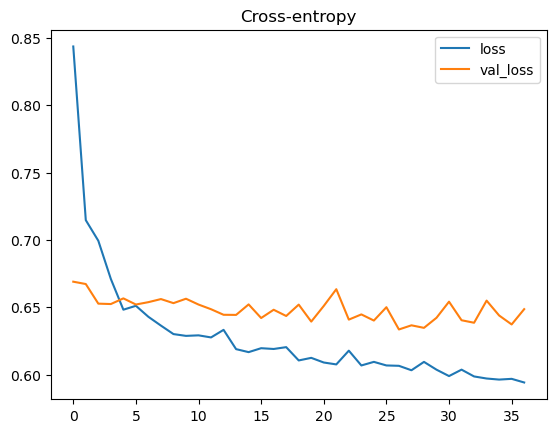

In [60]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [61]:
# Get prediction probabilities
predictions = model3.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_classes = (predictions > 0.5).astype("int32")

print(classification_report(y_test, y_classes))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1223
           1       0.65      0.60      0.62      1131

    accuracy                           0.65      2354
   macro avg       0.65      0.65      0.65      2354
weighted avg       0.65      0.65      0.65      2354



### confusion_matrix

In [62]:
print(confusion_matrix(y_test,y_classes))

[[851 372]
 [451 680]]
